In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt 

In [2]:
#pip install jupyter-tabnine --user

In [3]:
# Importing the Secondary libraries
import tensorflow
import plotly
import plotly.offline as pyo
import plotly.figure_factory as ff
from   plotly.tools import FigureFactory as FF, make_subplots
import plotly.graph_objs as go
from   plotly.graph_objs import *
from   plotly import tools
from   plotly.offline import download_plotlyjs, init_notebook_mode, iplot

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
plt.rcParams['figure.figsize'] = [12,8]
%matplotlib inline

### Importing the dataset

In [4]:
def dont_read_unamed_col(x):
    if 'Unnamed:' in x:
        return False
    return True

In [5]:
url = "https://github.com/toheebadura/Master-s-Thesis/blob/main/fulldataset.xlsx?raw=true"
dataframe = pd.read_excel(url, sheet_name="fulldataset", usecols=dont_read_unamed_col)
print(dataframe.shape) ##Get the shape of the initial dataset

(6010, 16)


In [6]:
dataframe

,Cluster,Site Name,EFFECTIVE_DATE_OF_VISIT,PREVIOUS_DATE_OF_VISIT,NUMBER_OF_DAYS,GENERATOR_1_CAPACITY_(KVA),CURRENT HOUR METER GE1,PREVIOUS HOUR METER G1,PREVIOUS_FUEL_QTE,QTE_FUEL_FOUND,QTE_FUEL_ADDED,TOTALE_QTE_LEFT,CONSUMPTION_HIS,RUNNING_TIME,CONSUMPTION_RATE,POWER TYPE
0,KOUSSERI,FIGUIL [ T0157 ],2017-09-26,2017-09-20,6,22,21136,20996,461.000,111.000,375.00,486.000,420.0,140.0,3.0,Gen Only
1,GUIDER,DEMBO [ T1408 ],2017-09-26,2017-09-22,4,22,2522,2424,685.000,440.000,0.00,440.000,254.8,98.0,2.6,Gen Only
2,GAROUA 1,BANGANA [ T2901 ],2017-09-26,2017-09-21,5,9,13284,13165,495.000,280.000,200.00,480.000,238.0,119.0,2.0,Gen Only
3,GUIDER,DEMBO [ T1408 ],2017-09-26,2017-09-20,6,9,19895,19751,350.000,140.000,300.00,440.000,288.0,144.0,2.0,Gen Only
4,KOUSSERI,FIGUIL [ T0157 ],2017-09-26,2017-09-21,5,12.5,16191,16117,154.000,2.000,300.00,302.000,148.0,74.0,2.0,Gen Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,GAROUA 1,Djalingo [ T0296 ],2018-08-28,2018-08-20,8,20,19056,18868,750.000,340.000,200.00,540.000,451.2,188.0,2.4,Gen Only
6006,NGONG,Padarme [ T1592 ],2018-08-28,2018-08-25,3,13,5090,5052,120.000,12.000,400.00,412.000,38.0,38.0,1.0,Gen only
6007,Kaele,BOUDVA [ NRD_092 ],2018-08-27,2018-08-25,2,13,6461,6416,135.000,55.000,150.00,205.000,45.0,45.0,1.0,Gen Only
6008,NGONG,Djarako [ NRD_030 ],2018-08-27,2018-08-23,4,22,19126,19028,278.250,25.200,157.50,182.700,254.8,98.0,2.6,Gen Only


In [7]:
Data = dataframe.dropna(how = 'any')  ## Dropping missing observations
print(Data.shape)  #Dimension of cleaned data

(5905, 16)


In [8]:
Data.dtypes   ##Data types

Cluster                               object
Site Name                             object
EFFECTIVE_DATE_OF_VISIT       datetime64[ns]
PREVIOUS_DATE_OF_VISIT        datetime64[ns]
NUMBER_OF_DAYS                         int64
GENERATOR_1_CAPACITY_(KVA)            object
CURRENT HOUR METER GE1                object
PREVIOUS HOUR METER G1                object
PREVIOUS_FUEL_QTE                    float64
QTE_FUEL_FOUND                       float64
QTE_FUEL_ADDED                       float64
TOTALE_QTE_LEFT                      float64
CONSUMPTION_HIS                      float64
RUNNING_TIME                         float64
CONSUMPTION_RATE                     float64
POWER TYPE                            object
dtype: object

In [9]:
Data.describe()  ##Summary of the cleaned dataset

,NUMBER_OF_DAYS,PREVIOUS_FUEL_QTE,QTE_FUEL_FOUND,QTE_FUEL_ADDED,TOTALE_QTE_LEFT,CONSUMPTION_HIS,RUNNING_TIME,CONSUMPTION_RATE
count,5905.000000,5905.000000,5905.000000,5905.000000,5905.000000,5905.000000,5905.000000,5905.000000
mean,7.394412,502.921707,221.401993,279.807366,501.415964,261.795069,147.841490,1.835182
std,4.361820,290.115972,226.412815,204.158715,292.314300,175.076154,95.009452,0.577572
min,0.000000,0.000000,0.000000,0.000000,0.000000,-255.910000,-163.000000,0.000000
25%,4.000000,315.000000,75.000000,105.000000,310.000000,125.600000,72.000000,1.570000
50%,7.000000,475.000000,167.000000,275.000000,470.000000,240.000000,142.000000,1.800000
75%,10.000000,635.000000,300.000000,400.000000,635.000000,377.200000,221.000000,2.400000
max,64.000000,2530.000000,2222.000000,1450.000000,2530.000000,1315.600000,832.000000,3.500000


In [10]:
Data.columns   ### Variables names in the dataset

Index(['Cluster', 'Site Name', 'EFFECTIVE_DATE_OF_VISIT',
       'PREVIOUS_DATE_OF_VISIT', 'NUMBER_OF_DAYS',
       'GENERATOR_1_CAPACITY_(KVA)', 'CURRENT HOUR METER GE1',
       'PREVIOUS HOUR METER G1', 'PREVIOUS_FUEL_QTE', 'QTE_FUEL_FOUND',
       'QTE_FUEL_ADDED', 'TOTALE_QTE_LEFT', 'CONSUMPTION_HIS', 'RUNNING_TIME',
       'CONSUMPTION_RATE', 'POWER TYPE'],
      dtype='object')


### Creating new features from existing ones


In [11]:
Data['Daily_consumption_within_a_period'] = Data['CONSUMPTION_HIS']/(Data['NUMBER_OF_DAYS'])
Data.loc[~np.isfinite(Data['Daily_consumption_within_a_period']), 'Daily_consumption_within_a_period'] = 0

Data['Quantity_consumed_btn_visits'] = Data['PREVIOUS_FUEL_QTE'] - Data['QTE_FUEL_FOUND']

Data['Daily_consumed_Quantity_btn_visits'] = Data['Quantity_consumed_btn_visits']/(Data['NUMBER_OF_DAYS'])
Data.loc[~np.isfinite(Data['Daily_consumed_Quantity_btn_visits']), 'Daily_consumed_Quantity_btn_visits']= 0

Data['Running_time_per_day'] = Data["RUNNING_TIME"]/Data["NUMBER_OF_DAYS"]             
Data.loc[~np.isfinite(Data['Running_time_per_day']), 'Running_time_per_day'] = 0

Data['Maximum_consumption_perDay'] = Data[['CONSUMPTION_RATE']]*24


In [12]:
Data.shape    #Shape of updated dataset

(5905, 21)

### Plot of the Running Time

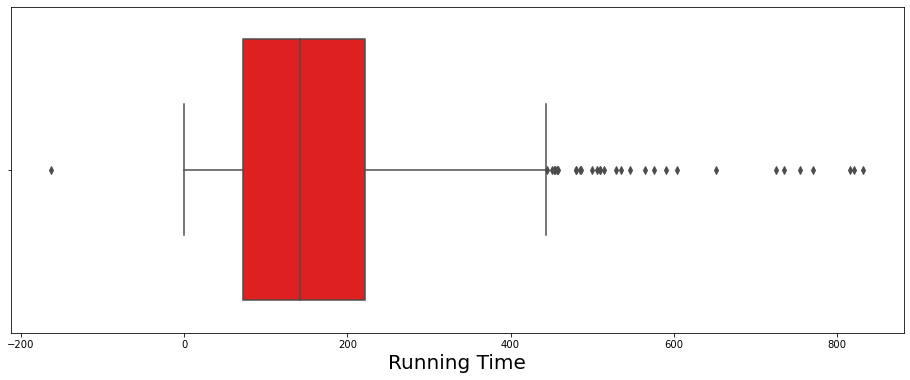

In [13]:
plt.figure(figsize=(16,6))
p = sns.boxplot(Data['RUNNING_TIME'], color = "r")
p.set_xlabel("Running Time", fontsize = 20);

In [14]:
# Removing columns with negative values
Data = Data[Data.select_dtypes(include=[np.number]).ge(0).all(1)]

### New Plot of the Running Time (excluding negative values)

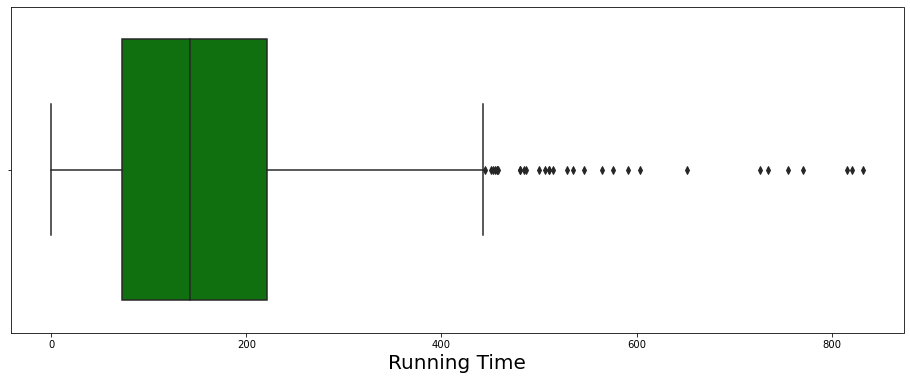

In [15]:
plt.figure(figsize=(16, 6))
pp = sns.boxplot(Data['RUNNING_TIME'], color = "g")
pp.set_xlabel("Running Time", fontsize = 20);

In [16]:
Data.shape  #Dimension of the modified dataset

(5902, 21)

In [17]:
Data.tail(3)   #Last three records

,Cluster,Site Name,EFFECTIVE_DATE_OF_VISIT,PREVIOUS_DATE_OF_VISIT,NUMBER_OF_DAYS,GENERATOR_1_CAPACITY_(KVA),CURRENT HOUR METER GE1,PREVIOUS HOUR METER G1,PREVIOUS_FUEL_QTE,QTE_FUEL_FOUND,...,TOTALE_QTE_LEFT,CONSUMPTION_HIS,RUNNING_TIME,CONSUMPTION_RATE,POWER TYPE,Daily_consumption_within_a_period,Quantity_consumed_btn_visits,Daily_consumed_Quantity_btn_visits,Running_time_per_day,Maximum_consumption_perDay
6007,Kaele,BOUDVA [ NRD_092 ],2018-08-27,2018-08-25,2,13,6461,6416,135.000,55.000,...,205.000,45.0,45.0,1.0,Gen Only,22.5,80.000,40.0000,22.5,24.0
6008,NGONG,Djarako [ NRD_030 ],2018-08-27,2018-08-23,4,22,19126,19028,278.250,25.200,...,182.700,254.8,98.0,2.6,Gen Only,63.7,253.050,63.2625,24.5,62.4
6009,Kaele,Kolara [ T1957 ],2018-08-26,2018-08-25,1,13,8866,8836,110.902,80.656,...,282.296,30.0,30.0,1.0,Gen only,30.0,30.246,30.2460,30.0,24.0


In [18]:
Data.describe()

,NUMBER_OF_DAYS,PREVIOUS_FUEL_QTE,QTE_FUEL_FOUND,QTE_FUEL_ADDED,TOTALE_QTE_LEFT,CONSUMPTION_HIS,RUNNING_TIME,CONSUMPTION_RATE,Daily_consumption_within_a_period,Quantity_consumed_btn_visits,Daily_consumed_Quantity_btn_visits,Running_time_per_day,Maximum_consumption_perDay
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,7.396306,503.092626,221.450147,279.815740,501.472597,261.940662,147.927821,1.835222,38.508128,281.642479,41.787026,20.886626,44.045327
std,4.361951,290.079640,226.454121,204.192645,292.345570,174.962099,94.929629,0.577702,18.997072,166.959401,19.557536,7.694675,13.864842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,315.000000,75.000000,105.295750,310.000000,126.000000,72.000000,1.570000,24.000000,154.183125,30.000000,21.000000,37.680000
50%,7.000000,475.000000,167.500000,275.000000,470.000000,240.000000,142.000000,1.800000,39.950000,264.000000,40.707143,23.727273,43.200000
75%,10.000000,635.000000,300.000000,400.000000,635.000000,377.200000,221.000000,2.400000,54.169821,388.000000,53.333333,24.181818,57.600000
max,64.000000,2530.000000,2222.000000,1450.000000,2530.000000,1315.600000,832.000000,3.500000,230.400000,1395.000000,340.000000,122.000000,84.000000



## **Data Visualization**

**Generator consumption between the month of September 2017 and August 2018**

## Creating the Labels for Anomaly

In [19]:
a = list(Data['RUNNING_TIME'])
b = list(Data['Quantity_consumed_btn_visits'])
c = []
for i in range(len(a)):
    if a[i] == 0  and  b[i]!=0:
        c.append(1)  #Anomaly
    else:
        c.append(0)  #Normal
        
k = list(Data['Running_time_per_day'])
v = []
for i in range(len(k)):
    if k[i] > 24:
        v.append(1)  #Anomaly
    else:
        v.append(0)  #Normal
        
t = list(Data['Maximum_consumption_perDay'])
r = list (Data['Daily_consumption_within_a_period'])
z = []
for i in range(len(r)):
    if r[i] > t[i]:
        z.append(1)  #Anomaly
    else:
        z.append(0)  #Normal
        
p = []
for i in range(len(z)):
    if c[i]==0 and z[i]==0 and v[i]==0:
        p.append(0)  #Normal
    else:
        p.append(1)  #Anomaly
Data['Class'] = p
#Data['Class'].unique()

In [20]:
class_freq = Data["Class"].value_counts()
class_percent = Data["Class"].value_counts(normalize=True)*100
print(class_freq)
print(class_percent)

0    3829
1    2073
Name: Class, dtype: int64
0    64.876313
1    35.123687
Name: Class, dtype: float64


In [21]:
Data.shape  #Dimension after Adding "Class" column

(5902, 22)

### Pie Chart of Classes

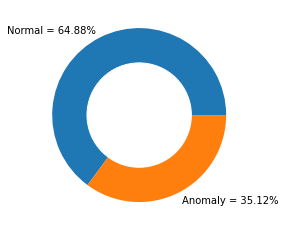

In [22]:
plt.pie(class_percent, labels = ['Normal = 64.88%', 'Anomaly = 35.12%'])
circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

### Scatterplot of Running Hours Per Day with the Visitation Day

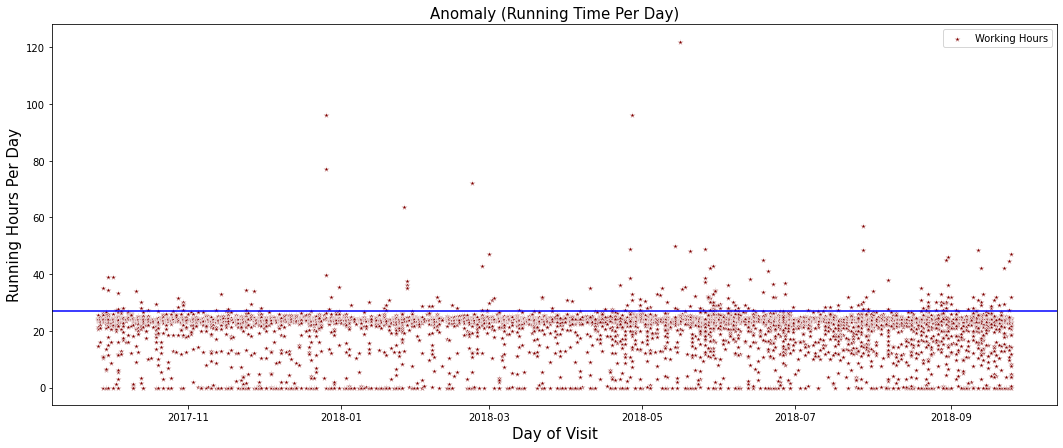

In [23]:
plt.figure(figsize=(18, 7))
sns.scatterplot(x=Data['EFFECTIVE_DATE_OF_VISIT'], y=Data['Running_time_per_day'], color="maroon", marker='*', label='Working Hours')
plt.axhline(27, color='b')
plt.title('Anomaly (Running Time Per Day)', fontsize = 15)
plt.xlabel('Day of Visit', fontsize = 15)
plt.ylabel('Running Hours Per Day', fontsize = 15);

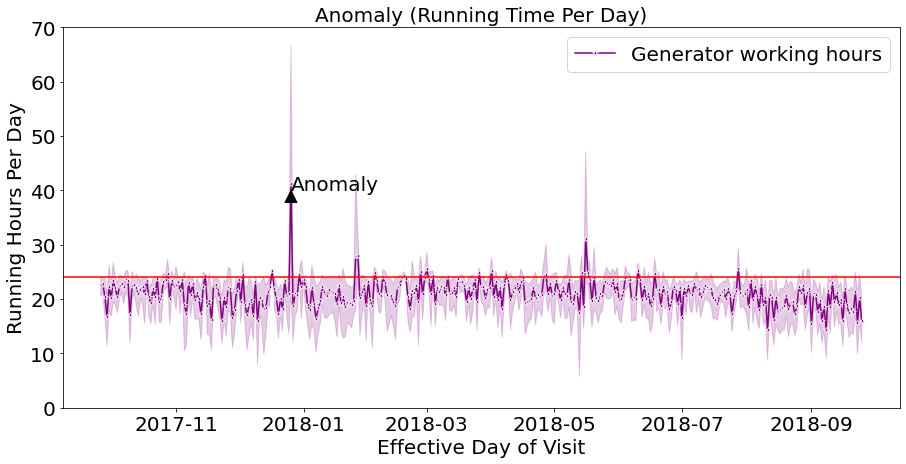

In [24]:
plt.figure(figsize=(15, 7))
plt.rcParams['font.size'] = 20
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.lineplot(x=Data['EFFECTIVE_DATE_OF_VISIT'], y=Data['Running_time_per_day'], color="purple", marker='*', label='Generator working hours')
plt.annotate('Anomaly', xy=('2017-12-26', 40),
           arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.axhline(24, color='r')
plt.title('Anomaly (Running Time Per Day)', fontsize = 20)
plt.xlabel('Effective Day of Visit', fontsize = 20)
plt.ylabel('Running Hours Per Day', fontsize = 20)
plt.ylim(0,70,5);

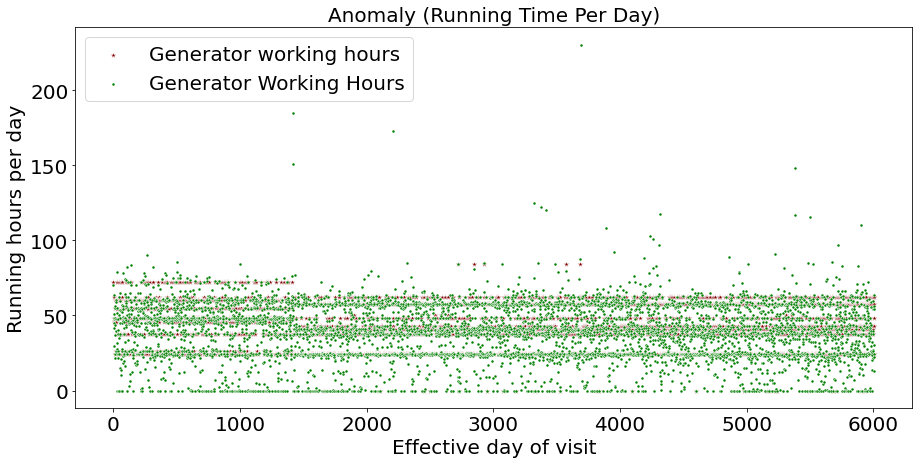

In [25]:
plt.figure(figsize=(15, 7))
plt.rcParams['font.size'] = 20
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.scatterplot(x=Data.index, y=Data['Maximum_consumption_perDay'], color="maroon", marker='*', label='Generator working hours')
#ax2 = ax.twinx()
sns.scatterplot(x=Data.index, y=Data['Daily_consumption_within_a_period'], color="green", marker='.', label='Generator Working Hours')
plt.title('Anomaly (Running Time Per Day)', fontsize = 20)
plt.xlabel('Effective day of visit', fontsize = 20)
plt.ylabel('Running hours per day', fontsize = 20);
#plt.ylim(0,70,5)

### **Correlation Matrix**

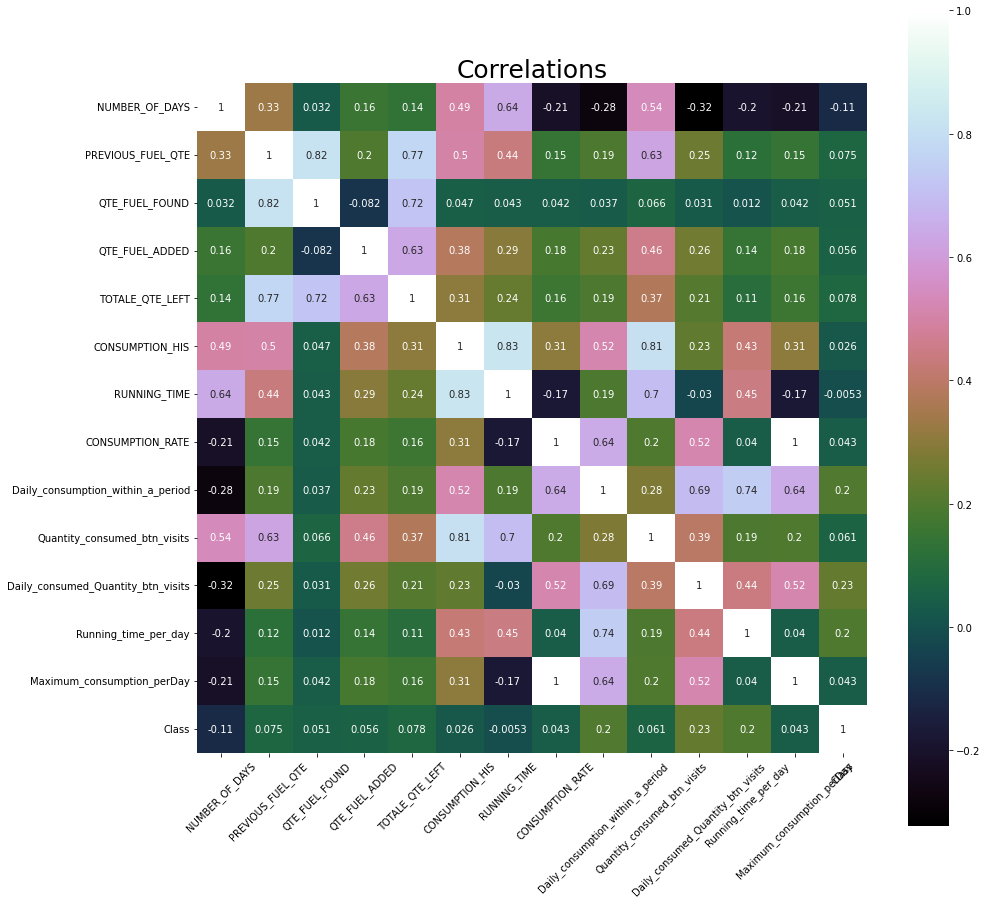

In [26]:
plt.rcParams['font.size'] = 10
correlation = Data.corr()  
plt.figure(figsize=(15, 15))  
plt.title("Correlations", fontsize= 25)
chart = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

### **Variable Selection**

In [27]:
dff=Data[[ 'NUMBER_OF_DAYS',
 'GENERATOR_1_CAPACITY_(KVA)',
 'CURRENT HOUR METER GE1',
 'PREVIOUS HOUR METER G1',
 'PREVIOUS_FUEL_QTE',
 'QTE_FUEL_FOUND',
 'QTE_FUEL_ADDED',
 'TOTALE_QTE_LEFT',
 'CONSUMPTION_HIS',
 'RUNNING_TIME',
 'CONSUMPTION_RATE',
 'Daily_consumption_within_a_period',
 'Quantity_consumed_btn_visits',
 'Daily_consumed_Quantity_btn_visits',
 'Running_time_per_day',
 'Maximum_consumption_perDay',
 'Class']]

In [28]:
dff.shape

(5902, 17)


### Feature Importance plot


In [29]:
#pip install yellowbrick

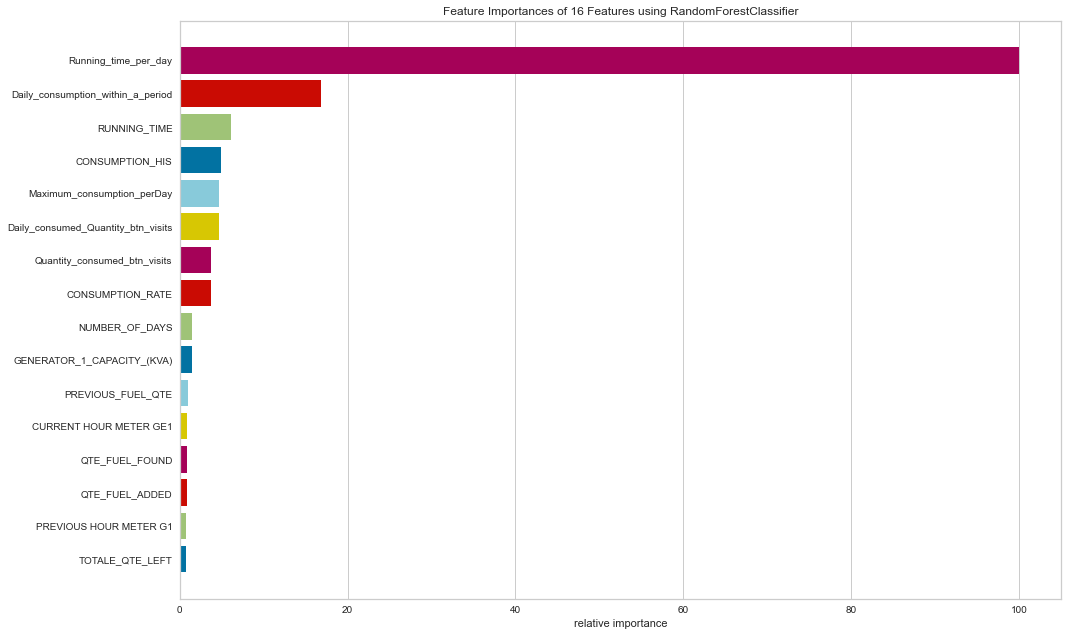

In [30]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
SS = dff.drop("Class",inplace=False, axis=1)
y = dff['Class']
plt.figure(figsize = (15,9))  
viz = FeatureImportances( RandomForestClassifier(random_state=43) )
viz.fit(SS, y)
viz.poof();

### Data Training and Testing Split and Scalling

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dff, test_size=0.2, random_state = 0)

# Extracting the normal classes for training
Y_train0 = X_train['Class']
X_train0= X_train.drop(['Class'], axis=1)
X_train0= X_train0.values

X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values

# Test data consising of anomaly and norms
Y_test  = X_test['Class']
X_test  = X_test.drop(['Class'], axis=1)
X_test  = X_test.values

# The entire Dataset
X_gen   = dff.drop(['Class'], axis=1)
X_gen   = X_gen.values
Y_gen   = dff['Class']

print('Training data size   :', X_train.shape)
print('Complete Training data size (Threshold Detection):', X_train0.shape)
print('Validation data size :', X_test.shape)
print('General data size :', X_gen.shape)

Training data size   : (3045, 16)
Complete Training data size (Threshold Detection): (4721, 16)
Validation data size : (1181, 16)
General data size : (5902, 16)


In [32]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [33]:
scaler = MinMaxScaler(feature_range=(0,1), copy=True)
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  =  scaler.transform(X_test)
X_gen_scaled  =  scaler.transform(X_gen)


### Model Building


In [34]:
# Import system packages
import os
import sys
import time
import logging
import importlib

#Import data manipulation libraries
import collections
from tqdm import tqdm

#Importing ML/DL libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,precision_recall_fscore_support, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix,accuracy_score

from keras import initializers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint
from keras import layers
from keras import activations
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
#from keras.layers import LeakyReLU
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation 
from keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate
import pickle

import tensorflow as tf

import random

In [35]:
# import tensorflow as tf
# import keras
# from keras.models import Model, load_model
# from keras.layers import Input, Dense
# from keras.callbacks import ModelCheckpoint, TensorBoard
# from keras import regularizers

## Generative Adversarial Networks

Generative Adversarial Networks (GAN) were introduced by Ian Goodfellow in [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661), Goodfellow, 2014.

<br>
<img src="https://drive.google.com/uc?id=14f7ZwXxyigpwx7bIVFxAOSb_aV28bFav" alt="Alt text that describes the graphic" title="Title text" />
<br>


The GAN consists of two networks namely: 
- The generator `G` that produces fake samples
- The discriminator `D` that that receives samples from both `G` and the dataset.

During Training the two networks have competing goals. The generator tries to fool the discriminator by outputting values that resemble real data and the discriminator tries to become better at distinguishing between the real and fake data.

Mathematically, this means that the Generator's weights are optimized to maximize the probability that fake data is classified as belonging to the real data. The discriminators's weights are optimized to maximize the probability that the real input data is classified as real while minimizing the probability of fake input data being classified as real.

Optimality is reached when the generator produces an output that the disciminator cannot concretely label as real or fake and this, happens when either of the networks cannot improve anymore.

<img src=./images/gan-optimality.PNG alt="Alt text that describes the graphic" title="Title text" />

The first part of the above equation reflects the log probability of the discriminator predicting that the input sample is genuine and the second half reflects the probability of the Discriminator predicting that the Generator's output is not genuine.

In this lab, we will be train our GAN on normal network packets. The generator inputs noise and as training progresses the GAN learns the mapping between these random values to the input distribution. The discriminator outputs a score of how likely the the generated output resembles the real data.

###  Generator Network 

The Generator is used to synthesize fake data points. As shown below, it consists of 5 Dense Layers with a `tanh` activation function and uses `binary cross-entropy` for calculating the generator loss. Binary cross-entropy loss measures the performance of a two class classification model whose output is a probability value between 0 and 1. A perfect model would have a loss of 0.

<img src="https://drive.google.com/uc?id=1Igvb1fdAQqRFn9of9-EzwkxJarIgqDfJ" alt="Alt text that describes the graphic" title="Title text" />

In [36]:
# Defining the Generator network

def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=16, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
       
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(16, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

###  Discriminator Network

<img src="https://drive.google.com/uc?id=1kaq-GZjHpf131v-fevLCQFCGm5Ala29z" alt="Alt text that describes the graphic" title="Title text" />
The Discriminator basically outputs the score of a sample belonging to the real dataset or the synthetic dataset. It consists of 6 dense layers-each followed by a dropout layer to help prevent overfitting. The sigmoid activation function is applied to the final layer to obtain a value in the range 0 to 1.


In [37]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=16, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

###  Building the Network

Previously we built the individual networks that constitute the GAN. Let us now stich them together by using the generator and discriminator as individual layers of the overall generative adversarial network. We set the field `discriminator.trainable = False` as we want to alter the weights of only one of them during training.

In [38]:
def get_gan_network(discriminator, generator, optimizer,input_dim=16):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

###  Setting the Hyperparameters 

Training a GAN can be quite tricky and time consuming. Refer to this <a href="https://github.com/soumith/ganhacks#authors">  link </a> to get a few ideas on how you could get your models to converge faster by choosing appropriate hyperparameters.

In [41]:
learning_rate = 0.00001
batch_size = 512
epochs = 100
adam = Adam(lr = learning_rate,beta_1 = 0.5)

###  Training the Model

The generator first predicts on a batch of noise samples. As the generator has randomly initialized weights initially, the output of the generator at this stage is nothing but meaningless values.
<br>
<img src=./images/Gan-Page-04.jpg alt="Alt text that describes the graphic" title="Title text" />
<br>
The Discriminator inputs a stack of samples - the first half of which is the output of the generator and the second half is a batch of data samples from the real dataset. We train the Discriminator on this stack with the target labels  0 (Fake) for half the stack and 1 for the second half of the stack. The result of this is that the Discrimator is able to distinguish between the Real and Fake samples.
<br>
<img src=./images/Gan-Page-2.jpg alt="Alt text that describes the graphic" title="Title text" />
<br>
The weights of the discriminator are frozen by setting the trainable parameter to False.

To train the Generator, We first feed it random noise and let the entire GAN output a probability with the Discriminator weights remaining frozen. As expected this value would be less than 0.5 since the Discriminator was previously set to output a value close to 0 if the input was not genuine .
<br>
<img src=./images/Gan-Page-3.jpg alt="Alt text that describes the graphic" title="Title text" />
<br>

Now comes the trick. We tell the GAN that the expected output is 1. This results in the errors being backpropagated only to the Generator. With every sample in the batch the generator's weights are tuned such that the output of the GAN is close to 1, meaning the Generator is now learning to produce samples that resemble the real data.

This process loops back to the first step for each batch in the training set.

##  I try to start modifying at this point

In [42]:
#Training the GAN
#x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'],dataset['x_test'],dataset['y_test']

#Calculating the number of batches based on the batch size
batch_count = X_train.shape[0] // batch_size
pbar = tqdm(total= epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=16)


for epoch in range(epochs):    
    
    for index in range(batch_count):        
        pbar.update(1)        
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,16])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = X_train[index * batch_size: (index + 1) * batch_size]
            
        X = np.vstack((generated_images, image_batch))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, 16])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))
              


 10%|█         | 39898/380000 [28:12<4:00:25, 23.58it/s]

  1%|▏         | 7/500 [00:04<02:54,  2.83it/s]

Epoch 0 Batch 4/5 [D loss: 30.459284] [G loss:0.688756]



  2%|▏         | 12/500 [00:05<01:30,  5.36it/s]

Epoch 1 Batch 4/5 [D loss: 21.585533] [G loss:0.684983]



  3%|▎         | 17/500 [00:06<01:20,  5.99it/s]

Epoch 2 Batch 4/5 [D loss: 23.052532] [G loss:0.680223]



  4%|▍         | 22/500 [00:07<01:15,  6.35it/s]

Epoch 3 Batch 4/5 [D loss: 15.870906] [G loss:0.676331]



  5%|▌         | 27/500 [00:07<01:17,  6.08it/s]

Epoch 4 Batch 4/5 [D loss: 19.414413] [G loss:0.671540]



  6%|▋         | 32/500 [00:08<01:18,  5.95it/s]

Epoch 5 Batch 4/5 [D loss: 7.219424] [G loss:0.666134]



  7%|▋         | 37/500 [00:09<01:23,  5.52it/s]

Epoch 6 Batch 4/5 [D loss: 10.189687] [G loss:0.660349]



  8%|▊         | 41/500 [00:10<01:19,  5.78it/s]


Epoch 7 Batch 4/5 [D loss: 10.881563] [G loss:0.656292]


  9%|▉         | 47/500 [00:11<01:17,  5.82it/s]

Epoch 8 Batch 4/5 [D loss: 7.232180] [G loss:0.649725]



 10%|█         | 52/500 [00:12<01:06,  6.74it/s]

Epoch 9 Batch 4/5 [D loss: 7.466573] [G loss:0.648049]



 11%|█▏        | 57/500 [00:13<01:07,  6.56it/s]

Epoch 10 Batch 4/5 [D loss: 8.127458] [G loss:0.641039]



 12%|█▏        | 62/500 [00:13<00:57,  7.59it/s]

Epoch 11 Batch 4/5 [D loss: 4.103280] [G loss:0.639581]



 13%|█▎        | 67/500 [00:14<00:58,  7.44it/s]

Epoch 12 Batch 4/5 [D loss: 6.467887] [G loss:0.634713]



 14%|█▍        | 72/500 [00:15<00:56,  7.56it/s]

Epoch 13 Batch 4/5 [D loss: 4.407967] [G loss:0.636879]



 15%|█▌        | 77/500 [00:15<00:55,  7.67it/s]

Epoch 14 Batch 4/5 [D loss: 3.175163] [G loss:0.627731]



 16%|█▋        | 82/500 [00:16<01:28,  4.74it/s]

Epoch 15 Batch 4/5 [D loss: 1.649163] [G loss:0.624257]



 17%|█▋        | 87/500 [00:17<01:16,  5.40it/s]

Epoch 16 Batch 4/5 [D loss: 2.293007] [G loss:0.622454]



 18%|█▊        | 92/500 [00:18<00:57,  7.08it/s]

Epoch 17 Batch 4/5 [D loss: 3.656135] [G loss:0.617755]



 19%|█▉        | 97/500 [00:19<00:51,  7.77it/s]

Epoch 18 Batch 4/5 [D loss: 2.298406] [G loss:0.612837]



 20%|██        | 102/500 [00:19<00:53,  7.39it/s]

Epoch 19 Batch 4/5 [D loss: 4.440155] [G loss:0.607167]



 21%|██▏       | 107/500 [00:20<00:57,  6.81it/s]

Epoch 20 Batch 4/5 [D loss: 1.715054] [G loss:0.607998]



 22%|██▏       | 112/500 [00:21<00:55,  6.95it/s]

Epoch 21 Batch 4/5 [D loss: 1.106938] [G loss:0.601145]



 23%|██▎       | 117/500 [00:21<00:55,  6.96it/s]

Epoch 22 Batch 4/5 [D loss: 2.354147] [G loss:0.595909]



 24%|██▍       | 122/500 [00:22<00:50,  7.50it/s]

Epoch 23 Batch 4/5 [D loss: 4.076013] [G loss:0.599533]



 25%|██▌       | 127/500 [00:23<00:49,  7.51it/s]

Epoch 24 Batch 4/5 [D loss: 2.433013] [G loss:0.595334]



 26%|██▋       | 132/500 [00:23<00:50,  7.24it/s]

Epoch 25 Batch 4/5 [D loss: 2.230104] [G loss:0.596507]



 27%|██▋       | 137/500 [00:24<00:47,  7.69it/s]

Epoch 26 Batch 4/5 [D loss: 0.920819] [G loss:0.599457]



 28%|██▊       | 142/500 [00:25<00:45,  7.93it/s]

Epoch 27 Batch 4/5 [D loss: 0.721240] [G loss:0.596179]



 29%|██▉       | 147/500 [00:25<00:44,  7.98it/s]

Epoch 28 Batch 4/5 [D loss: 1.576748] [G loss:0.597193]



 30%|███       | 152/500 [00:26<00:43,  7.96it/s]

Epoch 29 Batch 4/5 [D loss: 1.497115] [G loss:0.589763]



 31%|███▏      | 157/500 [00:27<00:41,  8.27it/s]

Epoch 30 Batch 4/5 [D loss: 1.013502] [G loss:0.585644]



 32%|███▏      | 162/500 [00:27<00:46,  7.22it/s]

Epoch 31 Batch 4/5 [D loss: 0.712905] [G loss:0.592910]



 33%|███▎      | 166/500 [00:28<00:55,  5.99it/s]

Epoch 32 Batch 4/5 [D loss: 3.306459] [G loss:0.590472]



 34%|███▍      | 172/500 [00:29<00:53,  6.08it/s]

Epoch 33 Batch 4/5 [D loss: 1.626978] [G loss:0.594760]



 35%|███▌      | 177/500 [00:30<00:41,  7.87it/s]

Epoch 34 Batch 4/5 [D loss: 2.266899] [G loss:0.586540]



 36%|███▋      | 182/500 [00:30<00:39,  8.14it/s]

Epoch 35 Batch 4/5 [D loss: 0.815464] [G loss:0.592803]



 37%|███▋      | 187/500 [00:31<00:38,  8.14it/s]

Epoch 36 Batch 4/5 [D loss: 0.742218] [G loss:0.591169]



 38%|███▊      | 192/500 [00:32<00:37,  8.28it/s]

Epoch 37 Batch 4/5 [D loss: 1.298247] [G loss:0.590310]



 39%|███▉      | 197/500 [00:32<00:44,  6.78it/s]

Epoch 38 Batch 4/5 [D loss: 1.327496] [G loss:0.596696]



 40%|████      | 202/500 [00:33<00:46,  6.45it/s]

Epoch 39 Batch 4/5 [D loss: 0.502735] [G loss:0.592042]



 41%|████▏     | 207/500 [00:34<00:44,  6.57it/s]

Epoch 40 Batch 4/5 [D loss: 1.060679] [G loss:0.594040]



 42%|████▏     | 212/500 [00:35<00:41,  6.95it/s]

Epoch 41 Batch 4/5 [D loss: 0.503825] [G loss:0.598253]



 43%|████▎     | 217/500 [00:35<00:38,  7.42it/s]

Epoch 42 Batch 4/5 [D loss: 3.121105] [G loss:0.592204]



 44%|████▍     | 222/500 [00:36<00:36,  7.70it/s]

Epoch 43 Batch 4/5 [D loss: 1.535638] [G loss:0.590913]



 45%|████▌     | 227/500 [00:37<00:34,  8.01it/s]

Epoch 44 Batch 4/5 [D loss: 1.394540] [G loss:0.588665]



 46%|████▋     | 232/500 [00:37<00:35,  7.57it/s]

Epoch 45 Batch 4/5 [D loss: 0.956258] [G loss:0.594131]



 47%|████▋     | 237/500 [00:38<00:32,  8.00it/s]

Epoch 46 Batch 4/5 [D loss: 0.521625] [G loss:0.594274]



 48%|████▊     | 242/500 [00:39<00:30,  8.35it/s]

Epoch 47 Batch 4/5 [D loss: 0.553194] [G loss:0.599017]



 49%|████▉     | 247/500 [00:39<00:27,  9.13it/s]


Epoch 48 Batch 4/5 [D loss: 0.972101] [G loss:0.603719]


 50%|█████     | 252/500 [00:40<00:26,  9.31it/s]


Epoch 49 Batch 4/5 [D loss: 1.170032] [G loss:0.597112]


 51%|█████▏    | 257/500 [00:40<00:25,  9.48it/s]

Epoch 50 Batch 4/5 [D loss: 0.412850] [G loss:0.601008]



 52%|█████▏    | 262/500 [00:41<00:24,  9.61it/s]


Epoch 51 Batch 4/5 [D loss: 0.957203] [G loss:0.602062]


 53%|█████▎    | 267/500 [00:41<00:24,  9.51it/s]


Epoch 52 Batch 4/5 [D loss: 0.590063] [G loss:0.601344]


 54%|█████▍    | 272/500 [00:42<00:26,  8.65it/s]

Epoch 53 Batch 4/5 [D loss: 0.394781] [G loss:0.599480]



 55%|█████▌    | 277/500 [00:42<00:26,  8.51it/s]

Epoch 54 Batch 4/5 [D loss: 0.778786] [G loss:0.598429]



 56%|█████▋    | 282/500 [00:43<00:26,  8.31it/s]

Epoch 55 Batch 4/5 [D loss: 0.705402] [G loss:0.605316]



 57%|█████▋    | 287/500 [00:44<00:25,  8.26it/s]

Epoch 56 Batch 4/5 [D loss: 0.390680] [G loss:0.598950]



 58%|█████▊    | 292/500 [00:44<00:24,  8.51it/s]

Epoch 57 Batch 4/5 [D loss: 0.384019] [G loss:0.600995]



 59%|█████▉    | 297/500 [00:45<00:23,  8.65it/s]

Epoch 58 Batch 4/5 [D loss: 0.853434] [G loss:0.607188]



 60%|██████    | 302/500 [00:45<00:23,  8.37it/s]

Epoch 59 Batch 4/5 [D loss: 0.567977] [G loss:0.609312]



 61%|██████▏   | 307/500 [00:46<00:22,  8.73it/s]

Epoch 60 Batch 4/5 [D loss: 0.661900] [G loss:0.609292]



 62%|██████▏   | 312/500 [00:47<00:22,  8.43it/s]

Epoch 61 Batch 4/5 [D loss: 0.981637] [G loss:0.599685]



 63%|██████▎   | 317/500 [00:47<00:21,  8.38it/s]

Epoch 62 Batch 4/5 [D loss: 0.549526] [G loss:0.601443]



 64%|██████▍   | 322/500 [00:48<00:20,  8.63it/s]

Epoch 63 Batch 4/5 [D loss: 0.360986] [G loss:0.610464]



 65%|██████▌   | 327/500 [00:48<00:20,  8.46it/s]

Epoch 64 Batch 4/5 [D loss: 0.586335] [G loss:0.614308]



 66%|██████▋   | 332/500 [00:49<00:20,  8.11it/s]

Epoch 65 Batch 4/5 [D loss: 0.907244] [G loss:0.614725]



 67%|██████▋   | 337/500 [00:50<00:19,  8.48it/s]

Epoch 66 Batch 4/5 [D loss: 0.833566] [G loss:0.613483]



 68%|██████▊   | 342/500 [00:50<00:18,  8.73it/s]

Epoch 67 Batch 4/5 [D loss: 1.047133] [G loss:0.615046]



 69%|██████▉   | 347/500 [00:51<00:17,  8.50it/s]

Epoch 68 Batch 4/5 [D loss: 1.110287] [G loss:0.616894]



 70%|███████   | 352/500 [00:51<00:17,  8.49it/s]

Epoch 69 Batch 4/5 [D loss: 0.419972] [G loss:0.619880]



 71%|███████▏  | 357/500 [00:52<00:15,  8.97it/s]


Epoch 70 Batch 4/5 [D loss: 0.445963] [G loss:0.614782]


 72%|███████▏  | 362/500 [00:52<00:14,  9.44it/s]


Epoch 71 Batch 4/5 [D loss: 0.598888] [G loss:0.621458]


 73%|███████▎  | 367/500 [00:53<00:14,  9.07it/s]

Epoch 72 Batch 4/5 [D loss: 0.388717] [G loss:0.620475]



 74%|███████▍  | 372/500 [00:54<00:15,  8.05it/s]

Epoch 73 Batch 4/5 [D loss: 0.561420] [G loss:0.617901]



 75%|███████▌  | 377/500 [00:54<00:14,  8.25it/s]

Epoch 74 Batch 4/5 [D loss: 0.830586] [G loss:0.620657]



 76%|███████▋  | 382/500 [00:55<00:14,  8.38it/s]

Epoch 75 Batch 4/5 [D loss: 0.894811] [G loss:0.623532]



 77%|███████▋  | 387/500 [00:55<00:13,  8.26it/s]

Epoch 76 Batch 4/5 [D loss: 0.733558] [G loss:0.622863]



 78%|███████▊  | 392/500 [00:56<00:14,  7.71it/s]

Epoch 77 Batch 4/5 [D loss: 0.381763] [G loss:0.626437]



 79%|███████▉  | 397/500 [00:57<00:15,  6.72it/s]

Epoch 78 Batch 4/5 [D loss: 0.873002] [G loss:0.627430]



 80%|████████  | 402/500 [00:58<00:17,  5.63it/s]

Epoch 79 Batch 4/5 [D loss: 0.391699] [G loss:0.632567]



 81%|████████▏ | 407/500 [00:59<00:15,  5.92it/s]

Epoch 80 Batch 4/5 [D loss: 0.906388] [G loss:0.625790]



 82%|████████▏ | 412/500 [00:59<00:14,  5.95it/s]

Epoch 81 Batch 4/5 [D loss: 0.965838] [G loss:0.629487]



 83%|████████▎ | 417/500 [01:00<00:13,  6.09it/s]

Epoch 82 Batch 4/5 [D loss: 0.829062] [G loss:0.629478]



 84%|████████▍ | 422/500 [01:01<00:11,  6.55it/s]

Epoch 83 Batch 4/5 [D loss: 0.548761] [G loss:0.625062]



 85%|████████▌ | 427/500 [01:02<00:11,  6.13it/s]

Epoch 84 Batch 4/5 [D loss: 0.727880] [G loss:0.629875]



 86%|████████▋ | 432/500 [01:03<00:10,  6.18it/s]

Epoch 85 Batch 4/5 [D loss: 0.405767] [G loss:0.631835]



 87%|████████▋ | 437/500 [01:03<00:10,  5.94it/s]

Epoch 86 Batch 4/5 [D loss: 1.134692] [G loss:0.633024]



 88%|████████▊ | 442/500 [01:04<00:09,  6.10it/s]

Epoch 87 Batch 4/5 [D loss: 0.412093] [G loss:0.633965]



 89%|████████▉ | 447/500 [01:05<00:08,  6.05it/s]

Epoch 88 Batch 4/5 [D loss: 1.060000] [G loss:0.635794]



 90%|█████████ | 452/500 [01:06<00:07,  6.29it/s]

Epoch 89 Batch 4/5 [D loss: 0.354080] [G loss:0.634938]



 91%|█████████▏| 457/500 [01:07<00:06,  7.05it/s]

Epoch 90 Batch 4/5 [D loss: 0.565207] [G loss:0.638499]



 92%|█████████▏| 462/500 [01:07<00:05,  7.46it/s]

Epoch 91 Batch 4/5 [D loss: 0.364170] [G loss:0.638598]



 93%|█████████▎| 467/500 [01:08<00:04,  7.77it/s]

Epoch 92 Batch 4/5 [D loss: 1.501098] [G loss:0.644000]



 94%|█████████▍| 472/500 [01:09<00:03,  7.59it/s]

Epoch 93 Batch 4/5 [D loss: 0.475110] [G loss:0.643544]



 95%|█████████▌| 477/500 [01:09<00:03,  7.28it/s]

Epoch 94 Batch 4/5 [D loss: 0.359614] [G loss:0.643985]



 96%|█████████▋| 482/500 [01:10<00:02,  7.51it/s]

Epoch 95 Batch 4/5 [D loss: 0.350415] [G loss:0.645218]



 97%|█████████▋| 487/500 [01:11<00:01,  7.39it/s]

Epoch 96 Batch 4/5 [D loss: 0.619558] [G loss:0.644250]



 98%|█████████▊| 492/500 [01:11<00:01,  6.77it/s]

Epoch 97 Batch 4/5 [D loss: 0.844704] [G loss:0.647350]



 99%|█████████▉| 497/500 [01:12<00:00,  7.56it/s]

Epoch 98 Batch 4/5 [D loss: 0.409500] [G loss:0.651668]



100%|██████████| 500/500 [01:12<00:00,  7.49it/s]

Epoch 99 Batch 4/5 [D loss: 0.769413] [G loss:0.650732]


###  Training Loss

Let's visualize the generator and discriminator training losses!

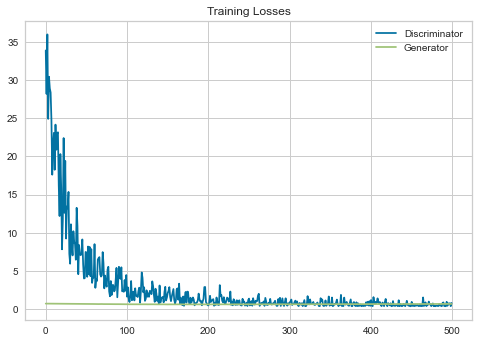

In [43]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend();

The loss convergence towards the end signifies that the GAN model has reached optimality

###  Anomaly Detection

What was the result of all the training we did?  

We now have a generator that can input a random seed value and produce an output that closely resembles the data it was trained on. You can read about how this strategy was used to come up with imaginary celebrities <a href ="https://research.nvidia.com/publication/2017-10_Progressive-Growing-of" >here</a>

The Discriminator that we trained ended up being a very powerful classifier that can tell if a sample point is representative of the true data distribution it was trained on or not and hence can be used for Anomaly Detection!

Let us feed our test data into the discriminator and obtain scores.

In [44]:
# Predictions on the test set

nr_batches_test = np.ceil(X_test.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = X_test[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=128,verbose=0)        
        results = np.append(results, tmp_rslt)   

Let us calculate the mean score for normal and anomalous samples in our test set. Ideally, we would like to see a score close to 1 for normal samples and 0 for anomalous samples. This would mean our classifier is doing well in distinguishing between the 2 classes.  

In [45]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(Y_test)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for normal packets :', results_df.loc[results_df['y_test'] == 0, 'results'].mean() )
print ('Mean score for anomalous packets :', results_df.loc[results_df['y_test'] == 1, 'results'].mean())

Mean score for normal packets : 0.9975158015107797
Mean score for anomalous packets : 0.9941525789407584


But how exaclty do we identify our Anomalies?

Although there are several ways to do this, let us use a more straight forward way for detection. Remember 1% of our test set comprised of anomalies. So, the lowest 1% of the scores should ideally constitute anomalies. Let us test our hypothesis below.

In [46]:
#Obtaining the lowest 1% score
per = np.percentile(results,1)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1


##  Evaluation

The Accuracy, Precision and Recall values of our model on the test set are as follows:

In [47]:
precision, recall, f1,_ = precision_recall_fscore_support(Y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(Y_test, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.336155800169348
Precision : 0.336155800169348
Recall : 1.0
F1 : 0.5031685678073511


###  Confusion Matrix

The confusion matrix is a good way to understand if our predictions agree with the target labels. You've implemented one of these in both of the previous labs, so in this section, you'll get a chance to build your own. 

Confusion Matrix :


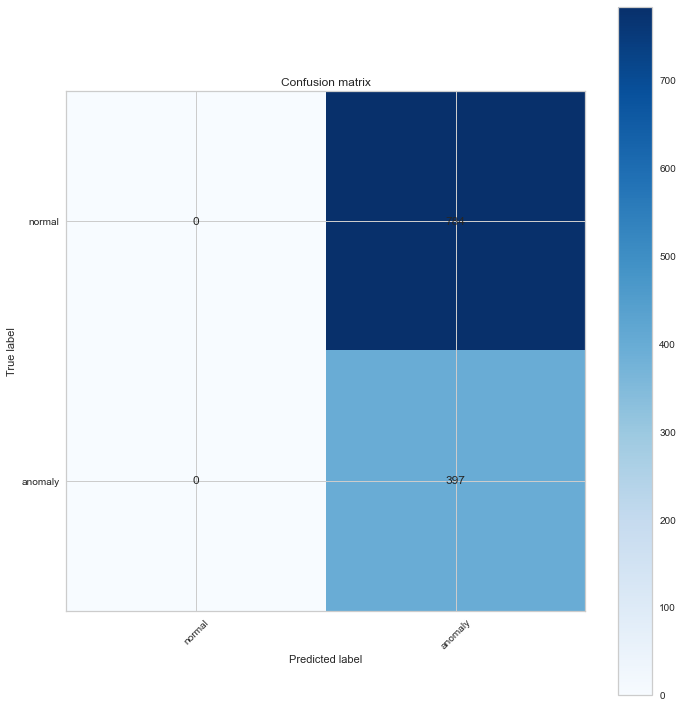

In [48]:
cm = confusion_matrix(Y_test, y_pred)
target_names = ['normal', 'anomaly']

print ('Confusion Matrix :')

def plot_confusion_matrix(cm,target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10),)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm,target_names)

##Run the function##

### ROC Curve

Let's see how our ROC curve looks with the predictions. The closer the AUC is to 1, the better the model.

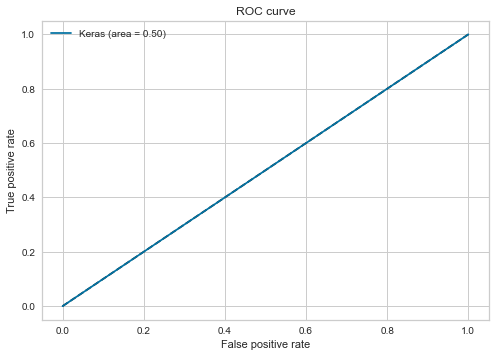

In [49]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Conclusion

- We successfully employed state of the art Generative Adversarial Networks for anomaly detection on high dimensional data such as the KDD dataset.
- The GAN is particularly interesting  because it sets up a supervised learning problem in order to do unsupervised learning. While it generates fake data, and tries to determine if a sample is fake or real based on trivial labels, it really does not know what the different classes in the dataset are.
- On the downside, GANs can be tough to train and suffer from convergence issues particularly because, the discriminator during training does not learn as much from the true dataset as it learns to distinguish between the probability distributions.

Take a moment to consider how each of the three methods actually detected anomalies. If time, take a moment to attempt to articulate each to a partner or write in a notebook or the space below. Bonus. Reflect on how each responded to the rarity of anomalies and why.

## References

<ol>
<li>Zenati, H., Foo, C., Lecouat, B., Manek, G. and Chandrasekhar, V. (2018). Efficient GAN-Based Anomaly Detection. [online]   Arxiv.org. Available at: https://arxiv.org/abs/1802.06222</li>

<li>Ben Poole Alex Lamb Martin Arjovsky Olivier Mastropietro Vincent Dumoulin, Ishmael Belghazi and Aaron Courville. Adversarially learned inference. International Conference on Learning Representations, 2017.</li>

<li>Antonia Creswell, Tom White, Vincent Dumoulin, Kai Arulkumaran, Biswa Sengupta, and Anil A.Bharath. Generative adversarial networks: An overview. In the Proceedings of IEEE Signal Processing Magazine Special Issue on Deep Learning for Visual Understanding, accepted paper,2017.</li>

<li>Martin Renqiang Min Wei Cheng Cristian Lumezanu Daeki Cho Haifeng Chen Bo Zong, Qi Song.Deep autoencoding gaussian mixture model for unsupervised anomaly detection. International Conference on Learning Representations, 2018.</li>

<li>Shuangfei Zhai, Yu Cheng, Weining Lu, and Zhongfei Zhang. Deep structured energy based models for anomaly detection. International Conference on Machine Learning, pp. 1100-1109, 2016.</li>
</ol>



<a href="https://www.nvidia.com/en-us/deep-learning-ai/education/"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>